In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
dataset = pd.read_csv("wine_data.csv")
'''X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values'''
X = dataset.drop('quality', axis=1)  # Features
y = dataset['quality'].apply(lambda y_value: 1 if y_value >= 5 else 0)  # Binary classification

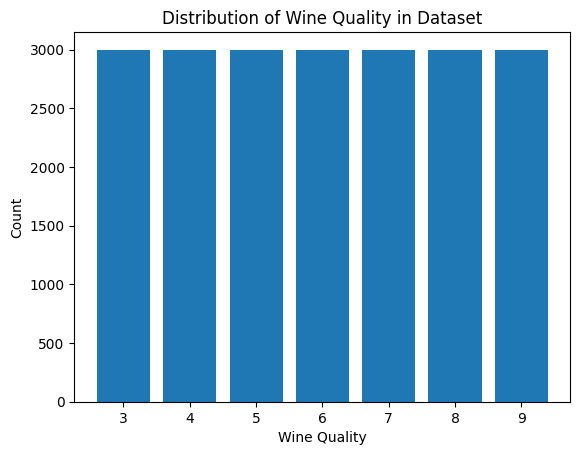

In [11]:
# data visualisation for checking data imbalance or not
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.title("Distribution of Wine Quality in Dataset")
plt.show()
# data is balanced

In [ ]:
print(X)

[[11.6    0.58   0.66  ...  3.25   0.57   9.   ]
 [10.4    0.61   0.49  ...  3.16   0.63   8.4  ]
 [ 7.4    1.185  0.    ...  3.63   0.54  10.7  ]
 ...
 [13.4    0.46   1.04  ...  2.89   1.76   9.3  ]
 [ 6.6    1.03   1.09  ...  2.94   1.54  12.9  ]
 [ 9.3    0.93   1.32  ...  3.16   1.42  13.   ]]


In [ ]:
#one hot encoding of target value
'''from sklearn.preprocessing import OneHotEncoder
# Reshape y to be a column vector
y = y.reshape(-1, 1)

# Apply One-Hot Encoding
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()'''

'from sklearn.preprocessing import OneHotEncoder\n# Reshape y to be a column vector\ny = y.reshape(-1, 1)  \n\n# Apply One-Hot Encoding\nencoder = OneHotEncoder()\ny = encoder.fit_transform(y).toarray()'

In [12]:
'''from sklearn.preprocessing import LabelEncoder
ls =   LabelEncoder()
y = ls.fit_transform(y)'''

In [3]:
#splitting of dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [ ]:
print(X_train)

[[ 8.3   0.65  0.1  ...  3.29  0.55  9.5 ]
 [ 6.9   0.32  0.13 ...  3.23  0.37  9.2 ]
 [11.8   0.95  1.19 ...  2.91  1.16 10.2 ]
 ...
 [ 5.9   0.36  0.41 ...  3.33  0.51 10.6 ]
 [ 7.7   0.3   0.34 ...  3.18  0.34 12.1 ]
 [10.9   0.51  1.28 ...  3.01  1.01  9.4 ]]


In [ ]:
print(X_test)

[[11.1   1.04  0.65 ...  2.91  0.61 10.8 ]
 [ 7.2   1.15  0.85 ...  3.16  1.28 12.5 ]
 [ 9.6   1.04  1.12 ...  3.14  1.33 11.2 ]
 ...
 [12.2   0.67  1.17 ...  3.04  1.08  9.3 ]
 [11.2   0.93  1.23 ...  3.01  1.09 11.9 ]
 [ 8.    1.12  0.58 ...  2.89  1.76 12.2 ]]


In [ ]:
print(y_train)

[5 5 4 ... 6 6 3]


In [ ]:
print(y_test)

[8 4 4 ... 4 3 7]


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

1. Logistic Regression and Multi-Class Classification
Logistic Regression is mainly used for binary classification (e.g., yes/no, 0/1). However, it can also handle multi-class classification (e.g., predicting a wine quality score from 3 to 9) by using different strategies.

2. multi_class='multinomial'
This parameter tells logistic regression how to handle multiple classes:
'ovr' (One-vs-Rest) → Default method, trains multiple binary classifiers for each class.
'multinomial' (Softmax Regression) → Trains a single model that assigns probabilities to all classes.
💡 Why use 'multinomial'?
'multinomial' considers all classes together instead of treating them separately.
It uses the softmax function, meaning it outputs probabilities for each class, and the class with the highest probability is chosen.
3. solver='lbfgs'
The solver is the optimization algorithm that finds the best model parameters.
'lbfgs' (Limited-memory Broyden–Fletcher–Goldfarb–Shanno) is a powerful solver that works well with multinomial logistic regression.
It is efficient for large datasets and works better with many features.

In [ ]:
# logistic model
'''from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0, multi_class= 'multinomial', solver='lbfgs')
classifier.fit(X_train,y_train)'''
# 29.5% accuracy

"from sklearn.linear_model import LogisticRegression\nclassifier = LogisticRegression(random_state =0, multi_class= 'multinomial', solver='lbfgs')\nclassifier.fit(X_train,y_train)"

In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 5000)
classifier.fit(X_train,y_train)
#60% accuracy with 7 less than scaling
#70.8% accuracy with less than 5 scaling

LogisticRegression(max_iter=5000)

In [ ]:
# knn model
'''from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
classifier.fit(X_train,y_train)'''
# 40% accuracy

"from sklearn.neighbors import KNeighborsClassifier\nclassifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)\nclassifier.fit(X_train,y_train)"

In [ ]:
# SVM model
'''from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state =0)
classifier.fit(X_train,y_train)'''
#32.9% accuracy with poly
#32.2% accuracy with rbf
#29.4% accuracy with linear

"from sklearn.svm import SVC\nclassifier = SVC(kernel = 'poly', random_state =0)\nclassifier.fit(X_train,y_train)"

In [ ]:
# naive bayes
'''from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)'''
# 27.2% accuracy

'from sklearn.naive_bayes import GaussianNB\nclassifier = GaussianNB()\nclassifier.fit(X_train,y_train)'

In [ ]:
# decison tree
'''from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion ='entropy', random_state =0)
classifier.fit(X_train,y_train)'''
# 57.4% accuracy

"from sklearn.tree import DecisionTreeClassifier\nclassifier = DecisionTreeClassifier(criterion ='entropy', random_state =0)\nclassifier.fit(X_train,y_train)"

In [ ]:
# random forest
'''from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state =0)
classifier.fit(X_train,y_train)'''
# 58.8 % accuracy

"from sklearn.ensemble import RandomForestClassifier\nclassifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state =0)\nclassifier.fit(X_train,y_train)"

In [ ]:
# ensemble model
'''from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='poly', probability=True)  # Using probability=True for soft voting
logistic = LogisticRegression()
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)

# Voting Classifier (Soft Voting gives better performance)
classifier = VotingClassifier(estimators=[
    ('knn', knn),
    ('svm', svm),
    ('logistic', logistic),
    ('rf', random_forest)
], voting='soft')  # Use 'hard' for majority voting, 'soft' for probability-based

# Train
classifier.fit(X_train, y_train)'''
# 58% accuracy

"from sklearn.ensemble import VotingClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.svm import SVC\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.ensemble import RandomForestClassifier\n\n# Initialize models\nknn = KNeighborsClassifier(n_neighbors=5)\nsvm = SVC(kernel='poly', probability=True)  # Using probability=True for soft voting\nlogistic = LogisticRegression()\nrandom_forest = RandomForestClassifier(n_estimators=100, random_state=0)\n\n# Voting Classifier (Soft Voting gives better performance)\nclassifier = VotingClassifier(estimators=[\n    ('knn', knn), \n    ('svm', svm), \n    ('logistic', logistic), \n    ('rf', random_forest)\n], voting='soft')  # Use 'hard' for majority voting, 'soft' for probability-based\n\n# Train\nclassifier.fit(X_train, y_train)"

📌 What is XGBoost?

XGBoost (Extreme Gradient Boosting) is an optimized gradient boosting algorithm that is designed for speed and performance. It is widely used in machine learning competitions and real-world applications due to its high accuracy, fast execution, and scalability.

🚀 Key Features of XGBoost
✅ Gradient Boosting – Uses an ensemble of decision trees, improving each tree based on errors from the previous ones.
✅ Regularization (L1 & L2) – Helps prevent overfitting, making it more generalizable.
✅ Handling Missing Values – Automatically detects and handles missing data.
✅ Parallel & Distributed Computing – Very fast due to its parallel tree building.
✅ Feature Importance – Helps in selecting the most important features.

🛠️ How Does XGBoost Work?
1️⃣ Starts with a weak model (like a small decision tree).
2️⃣ Calculates the error of predictions.
3️⃣ Creates a new tree to correct the previous errors.
4️⃣ Adds trees iteratively until the model reaches the best performance.

This process boosts weak learners into a strong predictive model.

In [ ]:
# xg boost model
'''y_train = y_train - 3  # Shift labels to be in range [0, 1, 2, 3, 4, 5, 6]  XGBoost expects class labels to start from 0, but your dataset has class labels starting from 3.
y_test = y_test - 3
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=5)
classifier.fit(X_train,y_train)'''
# 43.7% accuracy

'y_train = y_train - 3  # Shift labels to be in range [0, 1, 2, 3, 4, 5, 6]  XGBoost expects class labels to start from 0, but your dataset has class labels starting from 3.\ny_test = y_test - 3\nfrom xgboost import XGBClassifier\nclassifier = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=5)\nclassifier.fit(X_train,y_train)'

In [ ]:
'''from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
y_train = y_train - 3  # Shift labels to be in range [0, 1, 2, 3, 4, 5, 6]  XGBoost expects class labels to start from 0, but your dataset has class labels starting from 3.
y_test = y_test - 3

params = {
    "n_estimators": [100, 300],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.8]
}
grid_search = GridSearchCV(XGBClassifier(), param_grid=params, cv=5, scoring="accuracy", n_jobs=-1, error_score='raise')
grid_search.fit(X_train, y_train)


best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)'''
# Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}

'from xgboost import XGBClassifier\nfrom sklearn.model_selection import GridSearchCV\ny_train = y_train - 3  # Shift labels to be in range [0, 1, 2, 3, 4, 5, 6]  XGBoost expects class labels to start from 0, but your dataset has class labels starting from 3.\ny_test = y_test - 3\n\nparams = {\n    "n_estimators": [100, 300],  \n    "learning_rate": [0.05, 0.1],  \n    "max_depth": [3, 5],  \n    "subsample": [0.8],  \n    "colsample_bytree": [0.8]\n}\ngrid_search = GridSearchCV(XGBClassifier(), param_grid=params, cv=5, scoring="accuracy", n_jobs=-1, error_score=\'raise\')\ngrid_search.fit(X_train, y_train)  \n\n\nbest_xgb = grid_search.best_estimator_\nprint("Best Parameters:", grid_search.best_params_)'

In [ ]:
# model with best parameter
'''from xgboost import XGBClassifier
y_train = y_train - 3  # Shift labels to be in range [0, 1, 2, 3, 4, 5, 6]  XGBoost expects class labels to start from 0, but your dataset has class labels starting from 3.
y_test = y_test - 3

# Initialize model with best parameters
classifier = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=300,
    subsample=0.8
)

# Train the model
classifier.fit(X_train, y_train)'''
# 51.3% accuracy

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],          # Number of trees
    'max_depth': [10, 20, None],              # Maximum depth of trees
    'min_samples_split': [2, 5, 10],          # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],            # Min samples per leaf node
    'max_features': ['sqrt', 'log2', None],   # Number of features per split
    'bootstrap': [True, False]                # Bootstrapping
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with best parameters
classifier = RandomForestClassifier(**best_params, random_state=42)
classifier.fit(X_train, y_train)'''

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define optimized parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]  # Keep True for efficiency
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Use Randomized Search (Faster than GridSearch)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,  # Limits the search for speed
    cv=3,  # Reduce cross-validation folds for speed
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

# Fit the model
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Train final model with best parameters
classifier = RandomForestClassifier(**best_params, random_state=42)
classifier.fit(X_train, y_train)'''
#60.3% accuracy

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


RandomForestClassifier(max_depth=30, n_estimators=200, random_state=42)

In [ ]:
'''# Get feature importances
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order

# Select top k features (e.g., top 7 out of 11)
k = 7
X_train_selected = X_train[:, indices[:k]]
X_test_selected = X_test[:, indices[:k]]

# Train again with top features
classifier = RandomForestClassifier(**best_params, random_state=42)
classifier.fit(X_train_selected, y_train)

# Predict and check accuracy
y_pred = classifier.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Top {k} Features: {accuracy * 100:.2f}%")'''

Accuracy with Top 7 Features: 59.26%


In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distributions (smaller search space)
param_dist = {
    'n_estimators': np.arange(50, 300, 50),  # Reduced range
    'max_depth': [None, 10, 20],  # Fewer depth levels
    'min_samples_split': [2, 5],  # Only 2 values
    'min_samples_leaf': [1, 2],  # Only 2 values
    'max_features': ['sqrt'],  # Only 'sqrt' to speed up
    'bootstrap': [True]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search with only 10 iterations
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  # Only 10 random combinations
    cv=3,  # Reduce cross-validation folds
    n_jobs=-1,  # Use all CPU cores (reduce if system lags)
    random_state=42,
    scoring='accuracy',
    verbose=1
)

# Fit the model
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Train the optimized model
classifier = RandomForestClassifier(**best_params, random_state=42)
classifier.fit(X_train, y_train)'''

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42)

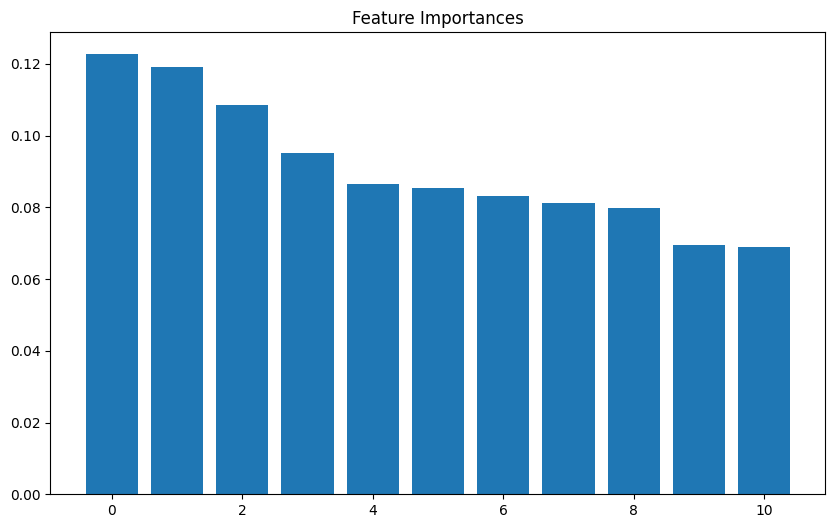

In [ ]:
# Get feature importances
'''importances = classifier.feature_importances_

# Sort and plot
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.show()'''

In [ ]:
# Select only the important features (Set a threshold like 0.05)
'''important_features = np.where(importances > 0.05)[0]
X_train_filtered = X_train[:, important_features]
X_test_filtered = X_test[:, important_features]

# Train again with only the selected features
classifier = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
classifier.fit(X_train_filtered, y_train)'''
# 44.8% accuracy

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [7]:
'''y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))'''

AttributeError: 'Series' object has no attribute 'reshape'

In [6]:
import numpy as np

# Convert y_pred and y_test to NumPy arrays
y_pred = classifier.predict(X_test)
y_test_array = y_test.values  # Convert Pandas Series to NumPy array

# Now reshape properly
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test_array.reshape(len(y_test_array),1)),1))

[[1 1]
 [1 0]
 [1 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[  74 1106]
 [  82 2938]]


0.7171428571428572